In [2]:
%pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import glob

import numpy as np
import pandas as pd
from tqdm.auto import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from PIL import Image

from transformers import CLIPModel
from utils import processor
from mp import parse_urls_to_images, parse_ids_to_images, parse_query_to_ids

In [2]:
# Load the open CLIP model
# device = "cuda" if torch.cuda.is_available() else "cpu"
model = CLIPModel.from_pretrained("./out/m1").cpu()

In [3]:
def get_logits_per_text(texts, images):
    inputs = processor(text=texts, images=images, return_tensors="pt", padding=True)
    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.logits_per_text.softmax(dim=1).argsort(descending=True)

In [4]:
# urls = ["http://images.cocodataset.org/val2017/000000039769.jpg", "https://unsplash.com/photos/4mA9_5vbZ_s/download?force=true&w=360"]
# images = parse_urls_to_images(urls)
# text = ["two cats", "three cats"]

In [14]:
def search_images(query = 'a dog and a cat'):
    list_of_ids = parse_query_to_ids(query)
    return parse_ids_to_images(list_of_ids)

In [16]:
text = ['a dog and a cat']
images = []
for e in text:
    images += search_images(e)

In [20]:
%%time

for query, order in zip(text, get_logits_per_text(text, images).numpy()):
    print(query, order)

a dog and a cat [ 8 83 46 13 58 17 89 35 12 27 82 18 22 45 24  9 14 34 40 31 23 11 81 41
 32 15 84 39  4  6 26 37 21 29 38 33 47  5 42 44 25 28 36  1 16 49 86 20
 48 43  7 10 30  3 19  2  0 87 57 88 68 79 64 56 76 85 51 70 54 65 72 63
 66 53 62 50 80 77 55 78 71 60 69 74 73 61 67 75 59 52]
CPU times: total: 39.8 s
Wall time: 4.02 s


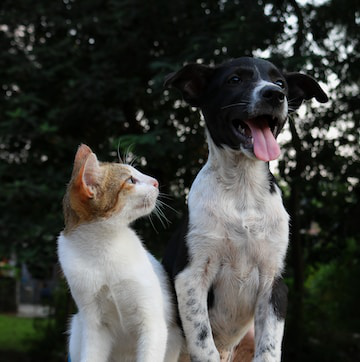

In [21]:
images[8]

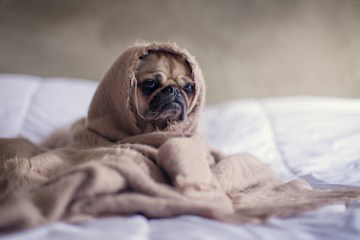

In [22]:
images[0]